# 官方教程 - 10分钟入门pandas

教程译自[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.18.0/10min.html)，有删改，[点击直达最新文档地址](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

首先导入Python数据处理中常用的三个库，如果没有需要提前使用 `pip` 安装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

注：本教程基于Pandas0.18.0版本，因版本不同可能有些代码无法成功执行，请自行查阅解决办法

## 创建数据

使用pd.Series创建Series对象

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过numpy的array数据来创建DataFrame对象

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,-1.816503,-0.748910,1.280319,-0.261669
2013-01-02,0.579750,0.925050,-0.261343,1.187734
2013-01-03,-1.172637,0.050605,-1.340176,-2.219963
2013-01-04,-0.970691,0.127320,0.701038,0.713336
2013-01-05,0.286029,1.310754,0.600536,0.720220
2013-01-06,-1.008658,-1.108387,0.177192,-0.399359


通过字典创建DataFrame对象

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
dir(df2)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '_

## 数据查看

基本方法，务必掌握，更多相关查看数据的方法可以参与[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics)

下面分别是查看数据的顶部和尾部的方法

In [12]:
df.head()

,A,B,C,D
2013-01-01,-1.816503,-0.748910,1.280319,-0.261669
2013-01-02,0.579750,0.925050,-0.261343,1.187734
2013-01-03,-1.172637,0.050605,-1.340176,-2.219963
2013-01-04,-0.970691,0.127320,0.701038,0.713336
2013-01-05,0.286029,1.310754,0.600536,0.720220


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.970691,0.127320,0.701038,0.713336
2013-01-05,0.286029,1.310754,0.600536,0.720220
2013-01-06,-1.008658,-1.108387,0.177192,-0.399359


查看DataFrame对象的索引，列名，数据信息

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-1.81650256, -0.74890975,  1.28031899, -0.26166851],
       [ 0.57974958,  0.92505038, -0.2613432 ,  1.18773363],
       [-1.17263729,  0.05060543, -1.34017603, -2.21996287],
       [-0.97069122,  0.12732021,  0.70103793,  0.71333612],
       [ 0.28602939,  1.31075394,  0.60053553,  0.72022005],
       [-1.0086583 , -1.10838704,  0.17719181, -0.39935852]])

描述性统计

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.683785,0.092739,0.192928,-0.043283
std,0.921623,0.930629,0.912552,1.231522
min,-1.816503,-1.108387,-1.340176,-2.219963
25%,-1.131643,-0.549031,-0.151709,-0.364936
50%,-0.989675,0.088963,0.388864,0.225834
75%,-0.028151,0.725618,0.675912,0.718499
max,0.579750,1.310754,1.280319,1.187734


数据转置

In [18]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.816503,0.579750,-1.172637,-0.970691,0.286029,-1.008658
B,-0.748910,0.925050,0.050605,0.127320,1.310754,-1.108387
C,1.280319,-0.261343,-1.340176,0.701038,0.600536,0.177192
D,-0.261669,1.187734,-2.219963,0.713336,0.720220,-0.399359


根据列名排序

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.261669,1.280319,-0.748910,-1.816503
2013-01-02,1.187734,-0.261343,0.925050,0.579750
2013-01-03,-2.219963,-1.340176,0.050605,-1.172637
2013-01-04,0.713336,0.701038,0.127320,-0.970691
2013-01-05,0.720220,0.600536,1.310754,0.286029
2013-01-06,-0.399359,0.177192,-1.108387,-1.008658


根据B列数值排序

In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-1.008658,-1.108387,0.177192,-0.399359
2013-01-01,-1.816503,-0.748910,1.280319,-0.261669
2013-01-03,-1.172637,0.050605,-1.340176,-2.219963
2013-01-04,-0.970691,0.127320,0.701038,0.713336
2013-01-02,0.579750,0.925050,-0.261343,1.187734
2013-01-05,0.286029,1.310754,0.600536,0.720220


## 数据选取

官方建议使用优化的熊猫数据访问方法`.at，.iat，.loc`和`.iloc`，部分较早的pandas版本可以使用`.ix`

这些选取函数的使用需要熟练掌握，我也曾写过相关文章帮助理解

- [5分钟学会Pandas中iloc/loc/ix区别](https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw)

### 使用\[\]选取数据

选取单列数据，等效于`df.A`:

In [21]:
df['A']

2013-01-01   -1.816503
2013-01-02    0.579750
2013-01-03   -1.172637
2013-01-04   -0.970691
2013-01-05    0.286029
2013-01-06   -1.008658
Freq: D, Name: A, dtype: float64

按行选取数据，使用[]

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,-1.816503,-0.748910,1.280319,-0.261669
2013-01-02,0.579750,0.925050,-0.261343,1.187734
2013-01-03,-1.172637,0.050605,-1.340176,-2.219963


In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.579750,0.925050,-0.261343,1.187734
2013-01-03,-1.172637,0.050605,-1.340176,-2.219963
2013-01-04,-0.970691,0.127320,0.701038,0.713336


### 通过标签选取数据

In [24]:
df.loc[dates[0]]

A   -1.816503
B   -0.748910
C    1.280319
D   -0.261669
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.816503,-0.748910
2013-01-02,0.579750,0.925050
2013-01-03,-1.172637,0.050605
2013-01-04,-0.970691,0.127320
2013-01-05,0.286029,1.310754
2013-01-06,-1.008658,-1.108387


In [26]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.579750,0.925050
2013-01-03,-1.172637,0.050605
2013-01-04,-0.970691,0.127320


In [27]:
df.loc['20130102',['A','B']]

A    0.57975
B    0.92505
Name: 2013-01-02 00:00:00, dtype: float64

In [28]:
df.loc[dates[0],'A']

-1.8165025645767248

In [29]:
df.at[dates[0],'A']

-1.8165025645767248

### 通过位置选取数据

In [30]:
df.iloc[3]

A   -0.970691
B    0.127320
C    0.701038
D    0.713336
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.970691,0.127320
2013-01-05,0.286029,1.310754


In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.579750,-0.261343
2013-01-03,-1.172637,-1.340176
2013-01-05,0.286029,0.600536


In [33]:
df.iloc[1:3]

,A,B,C,D
2013-01-02,0.579750,0.925050,-0.261343,1.187734
2013-01-03,-1.172637,0.050605,-1.340176,-2.219963


In [34]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.748910,1.280319
2013-01-02,0.925050,-0.261343
2013-01-03,0.050605,-1.340176
2013-01-04,0.127320,0.701038
2013-01-05,1.310754,0.600536
2013-01-06,-1.108387,0.177192


In [35]:
df.iloc[1, 1]

0.9250503773273979

In [36]:
df.iat[1, 1]

0.9250503773273979

### 使用布尔索引 

In [37]:
df[df.A>0]

,A,B,C,D
2013-01-02,0.579750,0.925050,-0.261343,1.187734
2013-01-05,0.286029,1.310754,0.600536,0.720220


In [38]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,1.280319,NaN
2013-01-02,0.579750,0.925050,NaN,1.187734
2013-01-03,NaN,0.050605,NaN,NaN
2013-01-04,NaN,0.127320,0.701038,0.713336
2013-01-05,0.286029,1.310754,0.600536,0.720220
2013-01-06,NaN,NaN,0.177192,NaN


In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one', 'one','two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,-1.816503,-0.748910,1.280319,-0.261669,one
2013-01-02,0.579750,0.925050,-0.261343,1.187734,one
2013-01-03,-1.172637,0.050605,-1.340176,-2.219963,two
2013-01-04,-0.970691,0.127320,0.701038,0.713336,three
2013-01-05,0.286029,1.310754,0.600536,0.720220,four
2013-01-06,-1.008658,-1.108387,0.177192,-0.399359,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.172637,0.050605,-1.340176,-2.219963,two
2013-01-05,0.286029,1.310754,0.600536,0.720220,four


### 修改数据

添加新列并自动按索引对齐数据

In [43]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

In [46]:
df.at[dates[0], 'A'] = 0

In [47]:
df.iat[0, 1] = 0

In [48]:
df.loc[:, 'D'] = np.array([5] * len(df)) 

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.280319,5,NaN
2013-01-02,0.579750,0.925050,-0.261343,5,1.0
2013-01-03,-1.172637,0.050605,-1.340176,5,2.0
2013-01-04,-0.970691,0.127320,0.701038,5,3.0
2013-01-05,0.286029,1.310754,0.600536,5,4.0
2013-01-06,-1.008658,-1.108387,0.177192,5,5.0


In [50]:
df2 = df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.280319,-5,NaN
2013-01-02,-0.579750,-0.925050,-0.261343,-5,-1.0
2013-01-03,-1.172637,-0.050605,-1.340176,-5,-2.0
2013-01-04,-0.970691,-0.127320,-0.701038,-5,-3.0
2013-01-05,-0.286029,-1.310754,-0.600536,-5,-4.0
2013-01-06,-1.008658,-1.108387,-0.177192,-5,-5.0


## 缺失值处理

缺失值处理是Pandas数据处理的一部分，以下仅展示了部分操作

有关缺失值的处理可以查看下面两篇文章：

- [Pandas缺失值处理详细方法详解](https://mp.weixin.qq.com/s/b1TgSiJb4OsmJLiZh4JNyg)
- [Pandas解决常见缺失值](https://mp.weixin.qq.com/s/YOsr8MIAporfl7Ew0xsm8Q)

### reindex

Pandas中使用`np.nan`来表示缺失值，可以使用`reindex`更改/添加/删除指定轴上的索引

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [54]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.280319,5,NaN,1.0
2013-01-02,0.579750,0.925050,-0.261343,5,1.0,1.0
2013-01-03,-1.172637,0.050605,-1.340176,5,2.0,NaN
2013-01-04,-0.970691,0.127320,0.701038,5,3.0,NaN


### 删除缺失值
舍弃含有NaN的行

In [56]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.57975,0.92505,-0.261343,5,1.0,1.0


### 填充缺失值
填充缺失数据

In [57]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.280319,5,5.0,1.0
2013-01-02,0.579750,0.925050,-0.261343,5,1.0,1.0
2013-01-03,-1.172637,0.050605,-1.340176,5,2.0,5.0
2013-01-04,-0.970691,0.127320,0.701038,5,3.0,5.0


In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 常用操作

在我的[Pandas120题](https://mp.weixin.qq.com/s/xgqmjTt4nxHJJZCE7acDhw)系列中有很多关于Pandas常用操作介绍！

欢迎微信搜索公众号【早起Python】关注

后台回复pandas获取相关习题！

### 统计

在进行统计操作时需要排除缺失值！

**描述性统计👇**

纵向求均值

In [59]:
df.mean()

A   -0.381035
B    0.217557
C    0.192928
D    5.000000
F    3.000000
dtype: float64

横向求均值

In [60]:
df.mean(1)

2013-01-01    1.570080
2013-01-02    1.448691
2013-01-03    0.907558
2013-01-04    1.571533
2013-01-05    2.239464
2013-01-06    1.612029
Freq: D, dtype: float64

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.172637,-0.949395,-2.340176,4.0,1.0
2013-01-04,-3.970691,-2.872680,-2.298962,2.0,0.0
2013-01-05,-4.713971,-3.689246,-4.399464,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply函数

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.280319,5,NaN
2013-01-02,0.579750,0.925050,1.018976,10,1.0
2013-01-03,-0.592888,0.975656,-0.321200,15,3.0
2013-01-04,-1.563579,1.102976,0.379838,20,6.0
2013-01-05,-1.277550,2.413730,0.980373,25,10.0
2013-01-06,-2.286208,1.305343,1.157565,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    1.752387
B    2.419141
C    2.620495
D    0.000000
F    4.000000
dtype: float64

### value_counts()

文档中为`Histogramming`，但示例就是`.value_counts()`的使用

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    4
1    3
2    4
3    1
4    6
5    4
6    3
7    2
8    2
9    3
dtype: int64

In [68]:
s.value_counts()

4    3
3    3
2    2
6    1
1    1
dtype: int64

### 字符串方法

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

在我的[Pandas120题](https://mp.weixin.qq.com/s/xgqmjTt4nxHJJZCE7acDhw)系列中有很多关于数据合并的操作，

欢迎微信搜索公众号【早起Python】关注

后台回复pandas获取相关习题！


### Concat

在连接/合并类型操作的情况下，pandas提供了各种功能，可以轻松地将Series和DataFrame对象与各种用于索引和关系代数功能的集合逻辑组合在一起。

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))

In [72]:
df

,0,1,2,3
0,-1.015764,1.649069,-0.061688,1.677879
1,-0.085610,0.245367,0.575536,-0.492835
2,-0.175922,-1.798418,0.722396,-0.172821
3,0.930606,0.511073,0.900794,1.044181
4,-0.937223,-0.577103,0.393607,0.876784
5,0.721099,-0.541871,-0.368237,-0.293150
6,-0.203084,0.511757,-0.744923,0.070973
7,-0.763386,-0.173728,0.326152,1.037979
8,-0.600392,1.648699,0.625757,1.222799
9,-0.559996,0.256255,1.399008,0.761844


In [73]:
pieces = [df[:3], df[3:6], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,-1.015764,1.649069,-0.061688,1.677879
1,-0.085610,0.245367,0.575536,-0.492835
2,-0.175922,-1.798418,0.722396,-0.172821
3,0.930606,0.511073,0.900794,1.044181
4,-0.937223,-0.577103,0.393607,0.876784
5,0.721099,-0.541871,-0.368237,-0.293150
7,-0.763386,-0.173728,0.326152,1.037979
8,-0.600392,1.648699,0.625757,1.222799
9,-0.559996,0.256255,1.399008,0.761844


**注意**

将列添加到DataFrame相对较快。 

但是，添加一行需要一个副本，并且可能浪费时间

我们建议将预构建的记录列表传递给DataFrame构造函数，而不是通过迭代地将记录追加到其来构建DataFrame

### Join

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [81]:
df

,A,B,C,D
0,0.348605,0.773479,1.837747,0.037354
1,0.582635,-0.139460,-0.370565,-0.527528
2,0.726356,-0.554628,0.549131,-1.217808
3,-1.094485,1.024316,0.706364,-0.420683
4,-0.260986,0.390038,0.223266,1.178017
5,0.536160,-1.820017,-0.498030,0.523865
6,-0.589363,0.045248,-1.160479,-0.939523
7,-0.371666,-1.132070,-0.748011,2.101760


In [82]:
s = df.iloc[3]

In [83]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.348605,0.773479,1.837747,0.037354
1,0.582635,-0.139460,-0.370565,-0.527528
2,0.726356,-0.554628,0.549131,-1.217808
3,-1.094485,1.024316,0.706364,-0.420683
4,-0.260986,0.390038,0.223266,1.178017
5,0.536160,-1.820017,-0.498030,0.523865
6,-0.589363,0.045248,-1.160479,-0.939523
7,-0.371666,-1.132070,-0.748011,2.101760
8,-1.094485,1.024316,0.706364,-0.420683


## 数据分组

**数据分组**是指涉及以下一个或多个步骤的过程：

- 根据某些条件将数据分成几组

- 对每个组进行独立的操作

- 对结果进行合并

更多操作可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.975475,0.239648
1,bar,one,-0.712556,-1.238397
2,foo,two,-0.238883,-0.568871
3,bar,three,1.547743,-0.330249
4,foo,two,-0.555028,-0.354915
5,bar,two,0.214590,-1.065279
6,foo,one,1.590873,-0.452706
7,foo,three,-0.168772,0.332419


In [85]:
df.groupby('A').sum()

,C,D
A,,
bar,1.049778,-2.633925
foo,1.603664,-0.804425


In [86]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.712556 -1.238397
    three  1.547743 -0.330249
    two    0.214590 -1.065279
foo one    2.566348 -0.213058
    three -0.168772  0.332419
    two   -0.793912 -0.923786

## 数据重塑

详细教程请参阅[分层索引和重塑](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical)部分。

### 数据堆叠
可以进行数据压缩

In [87]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))

In [88]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [89]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [90]:
df2 = df[:4]

In [91]:
df2

A         B
first second                    
bar   one    -0.201860  0.645289
      two    -0.009990  0.020387
baz   one    -0.629447  0.826020
      two     1.207124 -0.180798

In [92]:
stacked = df2.stack()

In [93]:
stacked

first  second   
bar    one     A   -0.201860
               B    0.645289
       two     A   -0.009990
               B    0.020387
baz    one     A   -0.629447
               B    0.826020
       two     A    1.207124
               B   -0.180798
dtype: float64

stack()的反向操作是unstack()，默认情况下，它会将最后一层数据进行unstack():

In [94]:
stacked.unstack()

A         B
first second                    
bar   one    -0.201860  0.645289
      two    -0.009990  0.020387
baz   one    -0.629447  0.826020
      two     1.207124 -0.180798

In [95]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.201860 -0.009990
      B  0.645289  0.020387
baz   A -0.629447  1.207124
      B  0.826020 -0.180798

In [96]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.201860 -0.629447
       B  0.645289  0.826020
two    A -0.009990  1.207124
       B  0.020387 -0.180798

### 数据透视表

Pandas中实现数据透视表很简单，但是相比之下并没有Excel灵活，可以查看我的文章
- [我用Python展示Excel中常用的20个操作](https://mp.weixin.qq.com/s/QuElbK6LhtgtmRXRiVMV5A)

In [97]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [98]:
df

,A,B,C,D,E
0,one,A,foo,0.566706,0.264463
1,one,B,foo,0.746775,0.929779
2,two,C,foo,0.015065,0.588480
3,three,A,bar,-2.019886,0.411278
4,one,B,bar,0.161201,0.168817
5,one,C,bar,1.665894,1.099600
6,two,A,foo,1.569924,-0.624598
7,three,B,foo,-0.624759,-0.547719
8,one,C,foo,1.211558,-0.585347
9,one,A,bar,0.449981,1.223425


In [99]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')

C             bar       foo
A     B                    
one   A  0.449981  0.566706
      B  0.161201  0.746775
      C  1.665894  1.211558
three A -2.019886       NaN
      B       NaN -0.624759
      C  0.502748       NaN
two   A       NaN  1.569924
      B -0.431516       NaN
      C       NaN  0.015065

## 时间序列

对于在频率转换期间执行重采样操作(例如，将秒数据转换为5分钟数据)，pandas具有简单、强大和高效的功能。这在金融应用中非常常见，但不仅限于此。 参见[时间序列](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)部分。

时区表示

In [100]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [101]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [102]:
ts.resample('5Min').sum()

2012-01-01    24278
Freq: 5T, dtype: int64

In [103]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [104]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [105]:
ts

2012-03-06    0.712207
2012-03-07    0.661001
2012-03-08    0.662904
2012-03-09    0.520834
2012-03-10   -0.717675
Freq: D, dtype: float64

In [106]:
ts_utc = ts.tz_localize('UTC')

In [107]:
ts_utc

2012-03-06 00:00:00+00:00    0.712207
2012-03-07 00:00:00+00:00    0.661001
2012-03-08 00:00:00+00:00    0.662904
2012-03-09 00:00:00+00:00    0.520834
2012-03-10 00:00:00+00:00   -0.717675
Freq: D, dtype: float64

时区转换

In [108]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.712207
2012-03-06 19:00:00-05:00    0.661001
2012-03-07 19:00:00-05:00    0.662904
2012-03-08 19:00:00-05:00    0.520834
2012-03-09 19:00:00-05:00   -0.717675
Freq: D, dtype: float64

在时间跨度表示之间进行转换

In [109]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [110]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [111]:
ts

2012-01-31   -0.673058
2012-02-29   -0.373640
2012-03-31    0.177163
2012-04-30   -1.115157
2012-05-31   -0.437982
Freq: M, dtype: float64

In [112]:
ps = ts.to_period()

In [113]:
ps

2012-01   -0.673058
2012-02   -0.373640
2012-03    0.177163
2012-04   -1.115157
2012-05   -0.437982
Freq: M, dtype: float64

In [114]:
ps.to_timestamp()

2012-01-01   -0.673058
2012-02-01   -0.373640
2012-03-01    0.177163
2012-04-01   -1.115157
2012-05-01   -0.437982
Freq: MS, dtype: float64

在周期和时间戳之间转换可以使用一些方便的算术函数。 

在以下示例中，我们将以11月结束的年度的季度频率转换为季度结束后的月末的上午9点：

In [115]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [116]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [117]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [118]:
ts.head()

1990-03-01 09:00    0.715446
1990-06-01 09:00   -0.017660
1990-09-01 09:00   -0.945859
1990-12-01 09:00    0.480226
1991-03-01 09:00   -1.422546
Freq: H, dtype: float64

事实上，常用有关时间序列的操作远超过上方的官方示例，简单来说与日期有关的操作从创建到转换pandas都能很好的完成！

## 灵活的使用分类数据

Pandas可以在一个DataFrame中包含分类数据。有关完整文档，请参阅分类介绍和API文档。

In [119]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [120]:
df['grade'] = df['raw_grade'].astype("category")

In [121]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

将类别重命名为更有意义的名称(`Series.cat.categories()`)

In [122]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排序类别，并同时添加缺少的类别(在有缺失的情况下，string .cat()下的方法返回一个新的系列)。

In [123]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [124]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [125]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [126]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 数据可视化

In [127]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [128]:
ts.head()

2000-01-01   -1.397617
2000-01-02   -1.155662
2000-01-03   -1.079465
2000-01-04   -1.265718
2000-01-05    0.747177
Freq: D, dtype: float64

In [129]:
ts = ts.cumsum() #累加

在Pandas中可以使用`.plot()`直接绘图，支持多种图形和自定义选项点击可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#plotting)

<AxesSubplot:>

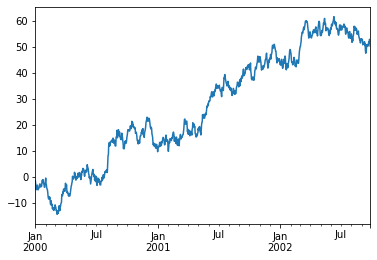

In [130]:
ts.plot()

In [131]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 

In [132]:
df = df.cumsum()

使用`plt`绘图，具体参数设置可以查阅matplotlib官方文档

<Figure size 432x288 with 0 Axes>

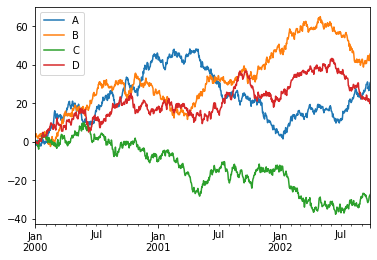

In [133]:
plt.figure(); df.plot(); plt.legend(loc='best')

## 导入导出数据

**将数据写入`csv`，如果有中文需要注意编码**

In [134]:
df.to_csv('foo.csv')

从`csv`中读取数据

In [135]:
# pd.read_csv('foo.csv').head()

将数据导出为`hdf`格式

In [136]:
df.to_hdf('foo.h5','df')

从`hdf`文件中读取数据前五行

In [137]:
# pd.read_hdf('foo.h5','df').head()

将数据保存为`xlsx`格式

In [138]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

从`xlsx`格式中按照指定要求读取sheet1中数据

In [139]:
# pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()